## GA Data Science 19 (DAT19) - Visualization

Visualizations are powerful ways of presenting new information in (hopefully) a clear and concise method. Great visualizations present the full context of your data while highlighting the main takeaway. It also is useful for exploring and understanding your data during an initial data analysis. You don't have to (and shouldn't) save visualizing data for the very end. This notebook demonstrates some common python resources for creating visualizations in data science.

In [1]:
import numpy as np
import pandas as pd

## Plotting!

In [2]:
import pandas.io.data
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, 1000)
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))
aapl.head()

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,82.500000,82.720001,80.870003,81.669998,22058200,81.669998
2015-04-02,82.250000,82.559998,81.440002,81.559998,19664100,81.559998
2015-04-06,80.800003,82.809998,80.800003,82.440002,19062900,82.440002
2015-04-07,82.650002,83.419998,82.220001,82.320000,17467000,82.320000
2015-04-08,82.629997,83.099998,81.839996,82.279999,18966700,82.279999


## MatPlotLib

MatPlotLib is a standard, granular method for building visualizations. Although tried and true, it can be cumbersome compared to other higher level packages such as Seaborn or Bokeh. Note most visualization packages use matplotlib as their base.

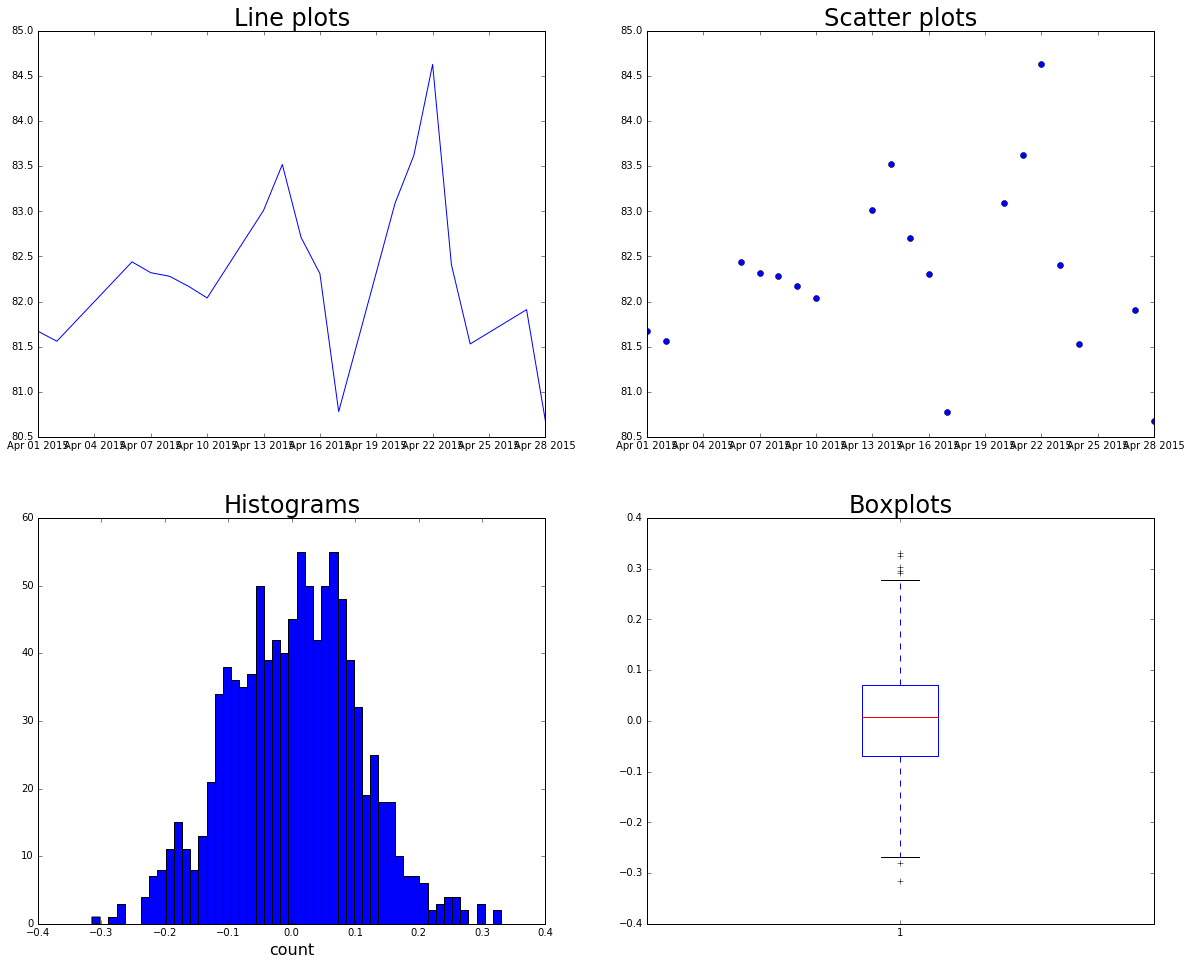

In [3]:
fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(2,2,1)
ax.plot(aapl.index, aapl['Close'])
ax.set_title('Line plots', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(aapl['Close'], 'o')
ax.set_title('Scatter plots', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(normal_dist, bins=50)
ax.set_title('Histograms', size=24)
ax.set_xlabel('count', size=16)

ax = fig.add_subplot(2,2,4)
ax.boxplot(normal_dist)
ax.set_title('Boxplots', size=24)

### Bokeh
To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.

In [4]:
from bokeh.plotting import figure, output_notebook,show
output_notebook()

Loading BokehJS ...

In [5]:
# prepare some data
x = aapl.Low
y = aapl['High']

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# add a line renderer with legend and line thickness
p.circle(x, y, legend="High vs. Low", line_width=2)

# show the results
show(p)

##Interpretting Datetimes

In [6]:
x = aapl.index
y = aapl.Close
p = figure(title="Stock Open & Close over time", x_axis_label='Date', y_axis_label='High',x_axis_type="datetime")

p.square(x, y, legend="Close")
p.circle(x,aapl.Open,legend='Open',color='red')
# show the results
show(p)

In [7]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

##Pandas Plotting!

The plot method is a great, quick way to visualize your dataframes. By selecting the columns you care to view, calling .plot() on the dataframe defaults to a line chart vs. the index.

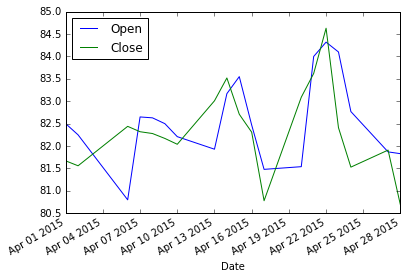

In [8]:
aapl[['Open','Close']].plot()

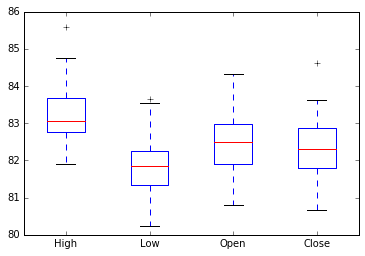

In [9]:
aapl[['High','Low','Open','Close']].plot(kind='box')

There is so much more to visualizations with Python such as Seaborn and Toyplot. For maps, there is a growing community of libraries including Folium. As you get into more advanced visualizations, there is a large community of D3.js users that make wonderful visualizations for the web. Vincent is a Python library that allows for creation of D3 objects if you're looking to learn more.